# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>Projeto de Conclusão: Topic Modeling</b></p>

<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
<b><font color=e91c5d>Contexto:</font></b><br><br>
<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
A QuantumFinance tem um canal de atendimento via chat e precisa classificar os assuntos<br>dos atendimentos para melhorar as tratativas dos chamados dos clientes.<br>
O canal recebe textos abertos dos clientes relatando o problema e/ou dúvida<br>e depois é direcionado para algum uma área especialista no assunto para uma melhor tratativa.</p><br>

<hr style='max-width: 85vw'><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
<b><font color=e91c5d>Tarefa:</font></b><br><br>
<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Crie um modelo classificador de assuntos aplicando técnicas de NLP<br>que consiga classificar através de um texto o assunto conforme disponível<br>na base de dados para treinamento e validação do modelo seu modelo.</p><br>

<hr style='max-width: 85vw'><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
<b><font color=e91c5d>Requisitos:</font></b><br><br>
<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
O modelo precisar atingir um score na métrica F1 Score superior a 75%.<br> Utilize o dataset para treinar e testar o modelo,<br>separe o dataset em duas amostras (75% para treinamento e 25% para teste).<br>
Utilize somente plataformas de machine learning baseado em cloud para desenvolver sua solução.</p><br>

<hr style='max-width: 85vw'><br>

* Base de dados: https://dados-ml-pln.s3.sa-east-1.amazonaws.com/tickets_reclamacoes_classificados.csv

In [ ]:
"""
Utilize os materiais anexados como especificações para os projetos.

Eles devem ser, preferencialmente, enviados em um repositório do GitHub <br>
e sua entrega será por meio de um arquivo texto com a URL pública do repositório.<br> 
Em caso de dificuldade de utilizar o GitHub os notebooks podem ser anexados diretamente.<br>

Os grupos que decidirem criar, além dos notebooks de exploração e treinamento, <br>
um aplicativo Streamlit publicado no StreamlitCloud, deve enviar a URL pública da aplicação <br>
e ganhará até 1 ponto adicional além da avaliação do projeto.

Entrega mínima: 

Notebook(s) Jupyter com o desenvolvimento do projeto
Artefatos utilizados, como imagens, dataset, features transformadas, etc.

Entrega adicional:

Aplicativo Streamlit para consumir o modelo.
"""

# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>1) Análise Exploratória de Dados:</b></p>
<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Primeiro, vamos carregar o dataset para entender sua estrutura, o tipo de dados que contém, e fazer uma análise exploratória básica.

### <p style='font-size: 20px; color:#e91c5d; text-align: Center;'><b>Importando biliotécas</b></p><hr style='max-width: 50vw'>

In [1]:
# Libs Utilizadas
import re
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer

### <p style='font-size: 20px; color:#e91c5d; text-align: Center;'><b>Análisando dados</b></p><hr style='max-width: 50vw'>

In [2]:
# Acessando dados
dados = pd.read_csv('tickets_reclamacoes_classificados.csv', sep=';')

In [3]:
# Visualizando os dados
dados.head()

,id_reclamacao,data_abertura,categoria,descricao_reclamacao
0,3229299,2019-05-01T12:00:00-05:00,Hipotecas / Empréstimos,"Bom dia, meu nome é xxxx xxxx e agradeço se vo..."
1,3199379,2019-04-02T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,Atualizei meu cartão xxxx xxxx em xx/xx/2018 e...
2,3233499,2019-05-06T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,O cartão Chase foi relatado em xx/xx/2019. No ...
3,3180294,2019-03-14T12:00:00-05:00,Cartão de crédito / Cartão pré-pago,"Em xx/xx/2018, enquanto tentava reservar um ti..."
4,3224980,2019-04-27T12:00:00-05:00,Serviços de conta bancária,"Meu neto me dê cheque por {$ 1600,00} Eu depos..."


In [4]:
# Verificando informações básicas do dataset
info_dataset = dados.info()
info_dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21072 entries, 0 to 21071
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id_reclamacao         21072 non-null  int64 
 1   data_abertura         21072 non-null  object
 2   categoria             21072 non-null  object
 3   descricao_reclamacao  21072 non-null  object
dtypes: int64(1), object(3)
memory usage: 658.6+ KB


In [5]:
# Verificando a existência de valores ausentes
missing_values = dados.isnull().sum()
missing_values

id_reclamacao           0
data_abertura           0
categoria               0
descricao_reclamacao    0
dtype: int64

In [6]:
# Convertendo 'data_abertura' para datetime
dados['data_abertura'] = pd.to_datetime(dados['data_abertura'])

# Verificando novamente os tipos de dados para confirmar a conversão
dados.dtypes

id_reclamacao                               int64
data_abertura           datetime64[ns, UTC-05:00]
categoria                                  object
descricao_reclamacao                       object
dtype: object

C:\Users\ersju\AppData\Local\Temp\ipykernel_36920\2926158117.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_count.values, y=categoria_count.index, palette="viridis")


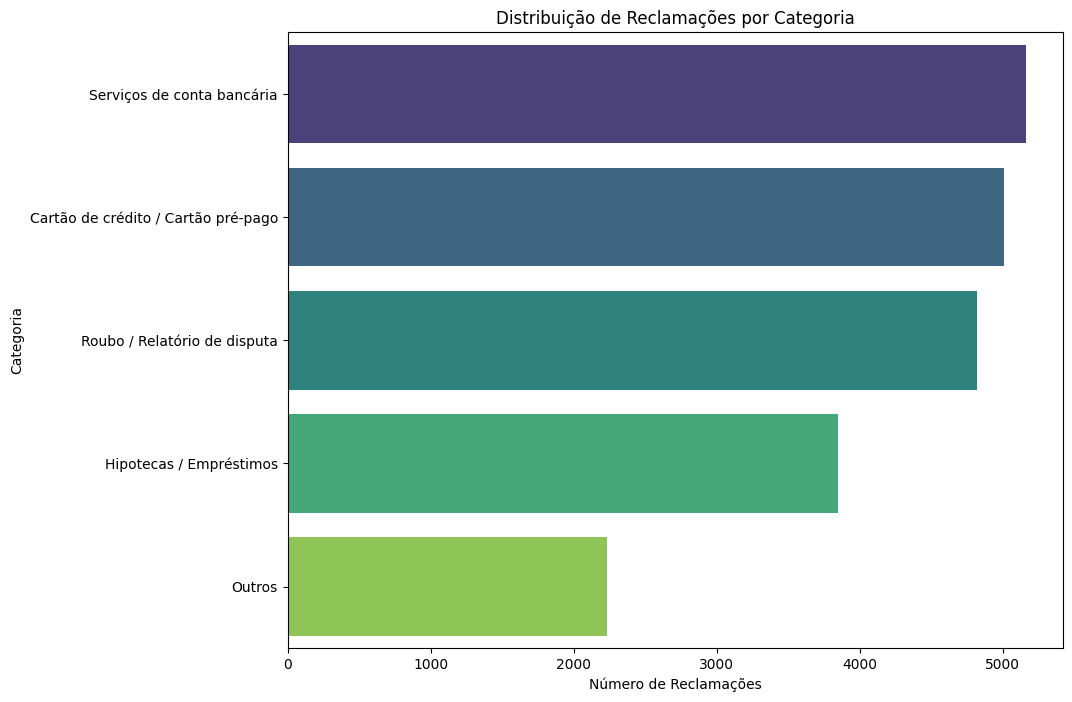

categoria
Serviços de conta bancária             5161
Cartão de crédito / Cartão pré-pago    5006
Roubo / Relatório de disputa           4822
Hipotecas / Empréstimos                3850
Outros                                 2233
Name: count, dtype: int64

In [7]:
# Contagem de reclamações por categoria
categoria_count = dados['categoria'].value_counts()

# Gráfico da distribuição de reclamações por categoria
plt.figure(figsize=(10, 8))
sns.barplot(x=categoria_count.values, y=categoria_count.index, palette="viridis")
plt.title('Distribuição de Reclamações por Categoria')
plt.xlabel('Número de Reclamações')
plt.ylabel('Categoria')
plt.show()

categoria_count

A distribuição de reclamações por categoria mostra que as categorias mais comuns são:

* Serviços de conta bancária
* Cartão de crédito / Cartão pré-pago
* Roubo / Relatório de disputa
* Hipotecas / Empréstimos
* Outros

Estes resultados indicam que a maior parte das reclamações se concentra em questões relacionadas a roubo ou disputas, cartões de crédito ou pré-pagos, e serviços de conta bancária.

<hr style='max-width: 50vw'>

In [8]:
# Baixando as stopwords do NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ersju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
# Lista de stopwords em português
stop_words = stopwords.words('portuguese')

In [10]:
# Inicializando o CountVectorizer sem remover stopwords
vectorizer_no_sw = CountVectorizer(max_features=100)

In [11]:
# Aplicando o CountVectorizer nas descrições das reclamações
X_no_sw = vectorizer_no_sw.fit_transform(dados['descricao_reclamacao'])

In [12]:
# Sumarizando as contagens de palavras
word_counts_no_sw = X_no_sw.sum(axis=0)
words_freq_no_sw = [(word, word_counts_no_sw[0, idx]) for word, idx in vectorizer_no_sw.vocabulary_.items()]
words_freq_no_sw = sorted(words_freq_no_sw, key=lambda x: x[1], reverse=True)

In [13]:
# Exibindo as 20 palavras mais comuns
words_freq_no_sw[:20]

[('de', 235401),
 ('xxxx', 225465),
 ('que', 182265),
 ('para', 102172),
 ('não', 86254),
 ('em', 83908),
 ('xx', 76729),
 ('chase', 67876),
 ('eu', 64006),
 ('um', 63753),
 ('uma', 59844),
 ('com', 56620),
 ('do', 51296),
 ('eles', 51231),
 ('me', 48780),
 ('meu', 46375),
 ('minha', 44026),
 ('conta', 42970),
 ('por', 41751),
 ('no', 40826)]

As 20 palavras mais frequentes nas descrições das reclamações incluem muitas preposições, conjunções e pronomes, como seria de esperar sem a remoção de stopwords. Notavelmente, a palavra ```"xxxx"``` aparece com alta frequência, provavelmente usada para anonimizar informações sensíveis nas descrições das reclamações. Palavras-chave relevantes como ```"chase"``` (possivelmente referindo-se a uma instituição financeira), ```"conta"```, e referências numéricas anonimizadas ```("xx")``` também são frequentes, o que indica temas comuns em torno de contas bancárias e transações financeiras.

<hr style='max-width: 50vw'>

C:\Users\ersju\AppData\Local\Temp\ipykernel_36920\2794156537.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dados['ano_mes'] = dados['data_abertura'].dt.to_period('M')


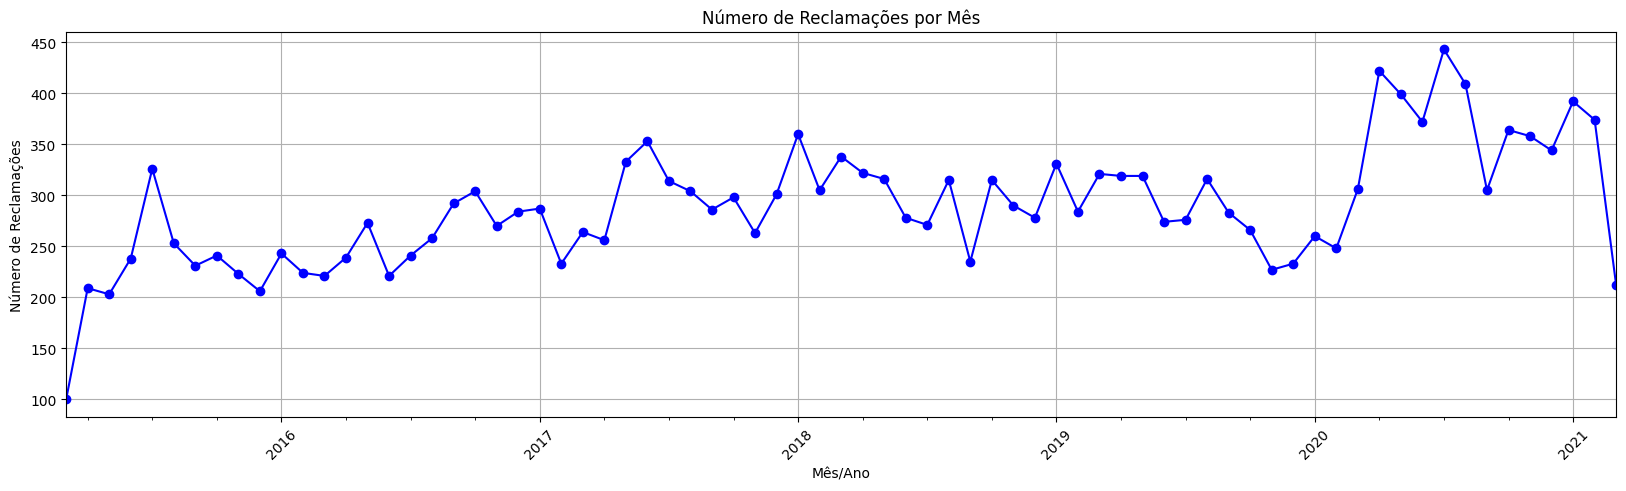

ano_mes
2015-03    100
2015-04    209
2015-05    203
2015-06    238
2015-07    326
          ... 
2020-11    358
2020-12    344
2021-01    392
2021-02    374
2021-03    212
Freq: M, Length: 73, dtype: int64

In [14]:
# Criando uma coluna apenas com o ano e o mês da data de abertura
dados['ano_mes'] = dados['data_abertura'].dt.to_period('M')

# Contagem de reclamações por ano e mês
reclamacoes_temporal = dados.groupby('ano_mes').size()

# Gráfico da série temporal de reclamações
plt.figure(figsize=(20, 5))
reclamacoes_temporal.plot(kind='line', marker='o', color='blue')
plt.title('Número de Reclamações por Mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Número de Reclamações')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

reclamacoes_temporal

A série temporal mostra o número de reclamações por mês ao longo do período coberto pelo dataset. Observa-se que os dados abrangem desde março de 2015 até novembro de 2020, com a quantidade de reclamações variando ao longo do tempo. Não há um padrão claro de aumento ou diminuição consistente no número de reclamações, mas existem flutuações que podem estar relacionadas a eventos específicos ou mudanças nas práticas comerciais.

<hr style='max-width: 50vw'>

C:\Users\ersju\AppData\Local\Temp\ipykernel_36920\59827672.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequência', y='Palavra', data=df_sentimento_freq, palette="rocket")


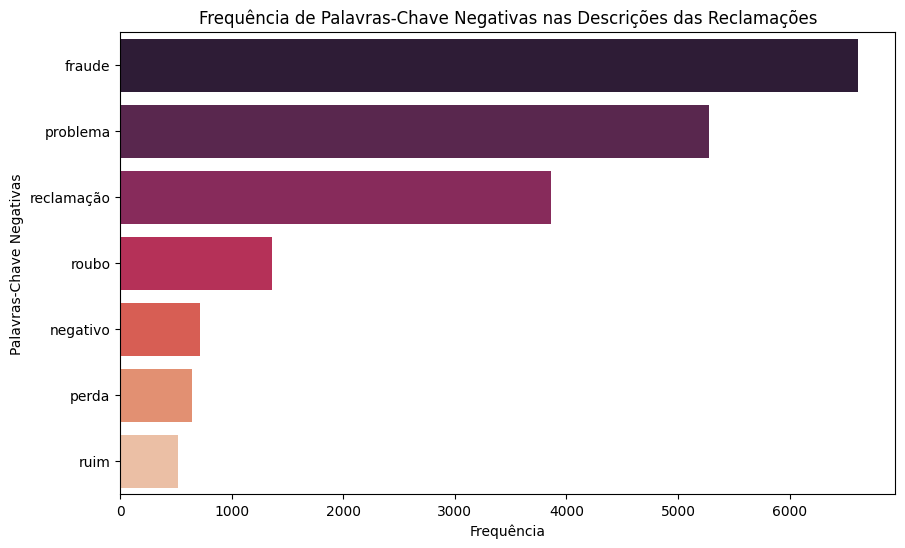

,Palavra,Frequência
3,fraude,6617
0,problema,5279
1,reclamação,3862
4,roubo,1359
6,negativo,713
5,perda,641
2,ruim,516


In [15]:
# Lista de palavras-chave que podem indicar sentimentos negativos
palavras_negativas = ['problema', 'reclamação', 'ruim', 'fraude', 'roubo', 'perda', 'negativo']

# Criando um novo CountVectorizer para capturar as palavras-chave negativas
vectorizer_sentimento = CountVectorizer(vocabulary=palavras_negativas)

# Aplicando o CountVectorizer nas descrições das reclamações
X_sentimento = vectorizer_sentimento.fit_transform(dados['descricao_reclamacao'])

# Sumarizando as contagens das palavras-chave negativas
sentimento_counts = X_sentimento.sum(axis=0)
sentimento_freq = [(word, sentimento_counts[0, idx]) for word, idx in vectorizer_sentimento.vocabulary_.items()]

# Convertendo a lista de frequências em um DataFrame para facilitar a visualização
df_sentimento_freq = pd.DataFrame(sentimento_freq, columns=['Palavra', 'Frequência'])

# Ordenando os valores para melhor visualização
df_sentimento_freq.sort_values(by='Frequência', ascending=False, inplace=True)

# Gráfico de barras das palavras-chave negativas
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequência', y='Palavra', data=df_sentimento_freq, palette="rocket")
plt.title('Frequência de Palavras-Chave Negativas nas Descrições das Reclamações')
plt.xlabel('Frequência')
plt.ylabel('Palavras-Chave Negativas')
plt.show()

df_sentimento_freq


O gráfico de barras acima mostra a frequência de palavras-chave negativas nas descrições das reclamações. ```"Fraude"``` é a palavra mais frequente, seguida por ```"problema"``` e ```"reclamação"```, o que reflete preocupações significativas dos consumidores em relação a fraudes e outros problemas relacionados a serviços financeiros. Palavras como ```"ruim"```, ```"roubo"```, ```"perda"``` e ```"negativo"``` também aparecem, embora com menos frequência, indicando uma variedade de sentimentos negativos expressos nas reclamações.

Este gráfico fornece uma visualização clara de quais aspectos negativos são mais mencionados nas reclamações, oferecendo insights valiosos sobre as principais preocupações dos consumidores.

<hr style='max-width: 50vw'>

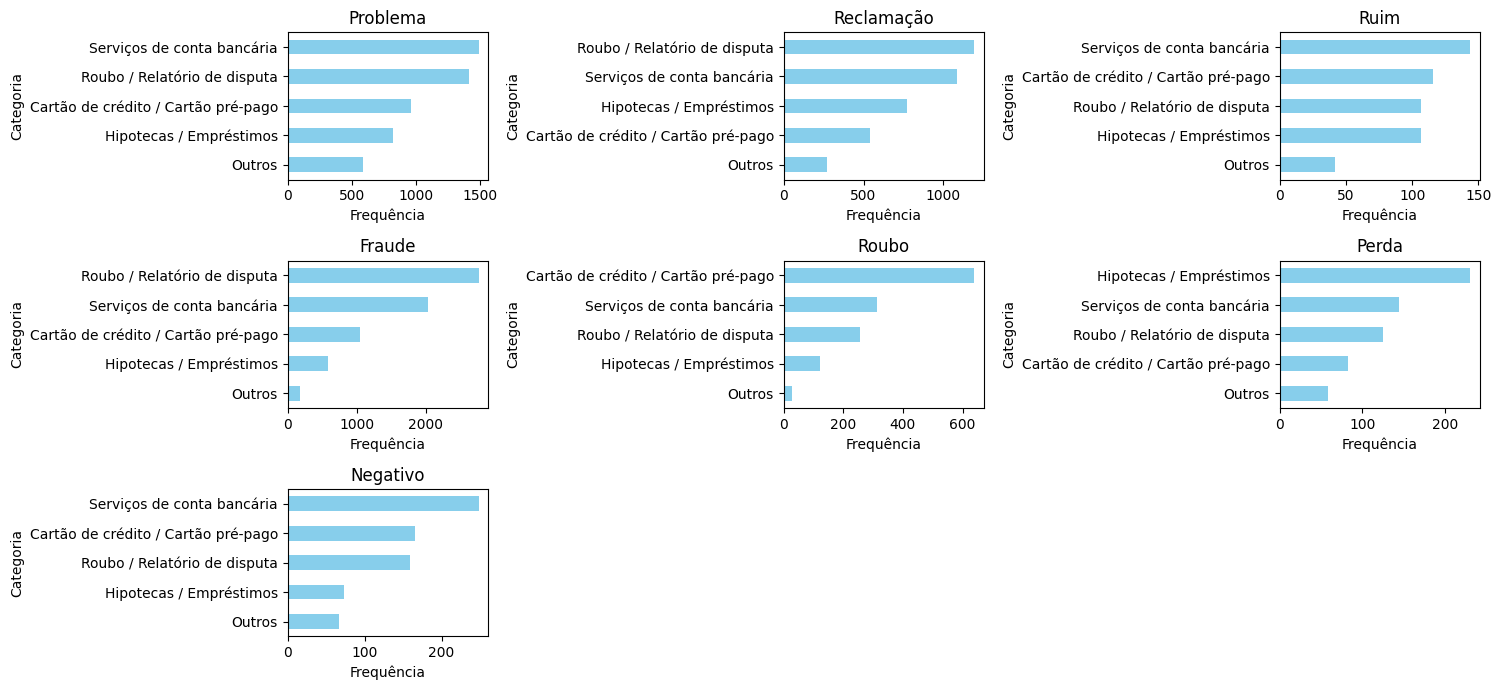

In [16]:
# Criando um DataFrame temporário para facilitar a análise
temp_df = pd.DataFrame(X_sentimento.toarray(), columns=vectorizer_sentimento.get_feature_names_out())
temp_df['categoria'] = dados['categoria']

# Calculando a soma de cada palavra-chave negativa por categoria
categoria_palavras_negativas = temp_df.groupby('categoria').sum()

# Configurando o tamanho do gráfico
plt.figure(figsize=(15, 7))

# Criando um gráfico de barras para cada palavra-chave negativa por categoria de reclamação
for i, column in enumerate(categoria_palavras_negativas.columns, start=1):
    plt.subplot(3, 3, i)
    categoria_palavras_negativas[column].sort_values().plot(kind='barh', color='skyblue')
    plt.title(column.capitalize())
    plt.xlabel('Frequência')
    plt.ylabel('Categoria')

# Ajustando o layout para evitar sobreposições
plt.tight_layout()
plt.show()

Os gráficos de barras acima mostram a frequência de cada palavra-chave negativa por categoria de reclamação. Através desses gráficos, podemos observar claramente as diferenças na prevalência de termos negativos entre as categorias, proporcionando insights visuais sobre quais categorias apresentam mais problemas relacionados a determinadas questões. Por exemplo:

* Fraude: É um problema significativo em ```"Roubo / Relatório de disputa"``` e ```"Serviços de conta bancária"```, com essas categorias mostrando as maiores frequências.
* Problema e Reclamação: Também são mais frequentes em ```"Roubo / Relatório de disputa"```, seguidos por ```"Serviços de conta bancária"```.
* Ruim, Roubo, Perda, e Negativo: Esses termos aparecem em várias categorias, mas com maior destaque novamente em ```"Roubo / Relatório de disputa"```.

Essa visualização facilita a identificação rápida de áreas que podem exigir atenção adicional ou investigação, destacando categorias com altos níveis de termos negativos que podem indicar insatisfação ou problemas específicos dos consumidores.

<hr style='max-width: 50vw'>

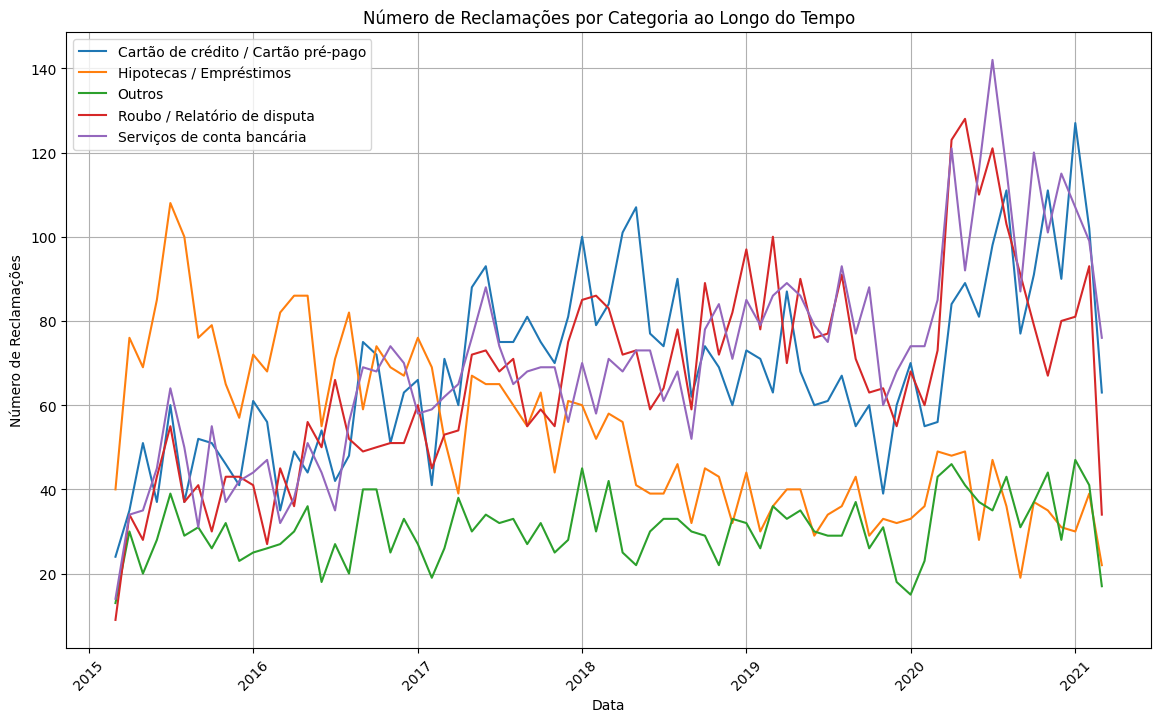

In [17]:
# Agrupando os dados por ano_mes e categoria, e contando o número de reclamações
reclamacoes_categoria_temporal = dados.groupby(['ano_mes', 'categoria']).size().unstack(fill_value=0)

# Convertendo o índice de Period para datetime para plotagem
reclamacoes_categoria_temporal.index = reclamacoes_categoria_temporal.index.to_timestamp()

# Plotando novamente as séries temporais para cada categoria
plt.figure(figsize=(14, 8))
for categoria in reclamacoes_categoria_temporal.columns:
    plt.plot(reclamacoes_categoria_temporal.index, reclamacoes_categoria_temporal[categoria], label=categoria)

plt.title('Número de Reclamações por Categoria ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Reclamações')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


A série temporal agora exibe o número de reclamações por categoria ao longo do tempo, permitindo-nos observar como diferentes categorias de reclamações evoluíram. A partir do gráfico, podemos notar variações no volume de reclamações em diferentes categorias ao longo do período considerado. Algumas categorias podem mostrar picos em determinados momentos, o que poderia indicar eventos específicos ou mudanças nas práticas de negócios que afetaram a satisfação do consumidor.

Este tipo de análise temporal é útil para identificar tendências e padrões ao longo do tempo, ajudando a entender melhor as dinâmicas do mercado e as respostas dos consumidores a diferentes produtos, serviços ou políticas.

### <p style='font-size: 20px; color:#e91c5d; text-align: Center;'><b>Conclusão da análise:</b></p><hr style='max-width: 50vw'>

Através desta análise exploratória aprofundada, incluindo a análise de tendências temporais por categoria, ganhamos insights valiosos sobre o comportamento das reclamações ao longo do tempo e a prevalência de sentimentos negativos em diferentes áreas. Essas informações podem ser úteis para:

- ```Empresas:``` Para melhorar produtos e serviços, abordando as áreas que geram mais reclamações ou insatisfação.
- ```Reguladores:``` Para focar esforços de fiscalização e regulamentação em categorias com altos volumes de reclamações ou problemas recorrentes.
- ```Consumidores:``` Para estar cientes dos problemas comuns em diferentes categorias de serviços e produtos.

# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>2) Pré-processamento dos textos:</b></p>
<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Esta etapa envolverá a limpeza e preparação dos dados textuais para modelagem, <br>incluindo a remoção de caracteres especiais, stop words, e possivelmente a aplicação de técnicas como stemming ou lemmatization.<br><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Para o pré-processamento avançado dos textos na coluna descricao_reclamacao, podemos aplicar várias técnicas, tais como:

* ```Limpeza dos dados:``` Remoção de caracteres especiais, números (a menos que sejam relevantes), e correção de espaços extras.
* ```Normalização:``` Conversão do texto para minúsculas.
* ```Tokenização:``` Divisão do texto em palavras ou tokens.
* ```Remoção de stopwords:``` Remoção de palavras comuns que geralmente não contribuem para o significado do texto.
* ```Stemming ou Lemmatização:``` Reduzir as palavras à sua forma base. A lemmatização é geralmente mais precisa pois usa um vocabulário e análise morfológica.
* ```Identificação e tratamento de abreviações e erros de digitação:``` Quando aplicável, corrigir ou expandir abreviações e erros de digitação para melhorar a análise.
* ```Remoção de dados pessoais:``` Substituição ou remoção de qualquer informação pessoal identificável para manter a privacidade e conformidade.

In [18]:
# Baixar recursos necessários do NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ersju\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ersju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ersju\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* <b>Método 1: Avançado (preprocess_text)</b>

    * Limpeza e Normalização: Similar ao método básico, remove caracteres não alfabéticos e normaliza o texto para minúsculas.
    * Tokenização: Divide o texto em palavras ou tokens, o que é crucial para análises mais detalhadas.
    * Remoção de Stopwords: Remove palavras comuns que geralmente não contribuem para o significado do texto, baseado no idioma especificado (neste caso, português). Isso pode melhorar a análise ao focar nas palavras mais significativas.
    * Lemmatização: Reduz as palavras à sua forma base ou lema, considerando a análise morfológica do texto. Isso ajuda a consolidar variações de uma palavra para a mesma base, facilitando a análise.
    * Reconstrução do Texto Pré-processado: Reconstrói o texto a partir dos tokens lematizados, fornecendo uma versão limpa e consolidada do texto original para análise.

In [19]:
# Função para pré-processamento de texto
def preprocess_text(text):
    # Remoção de informações pessoais identificáveis (PII) simulada (nesse caso, substituição por 'xxxx')
    text = re.sub(r'\bxxxx\b', '', text)
    
    # Normalização: remover caracteres não alfabéticos e converter para minúsculas
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # Tokenização
    tokens = word_tokenize(text)
    
    # Remoção de stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords.words('portuguese')]
    
    # Lemmatização
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    # Reconstruir o texto pré-processado
    preprocessed_text = ' '.join(lemmatized_tokens)
    
    return preprocessed_text

* <b>Método 2: Básico (preprocess_text_basic)</b>

    * Limpeza e Normalização: Realiza uma limpeza básica removendo caracteres não alfabéticos e normalizando o texto para minúsculas, similar ao método avançado.
    * Simplicidade: Não inclui tokenização, remoção de stopwords, nem lematização. Isso significa que o texto é tratado em um nível mais superficial, mantendo uma forma mais próxima ao texto original.
    * Facilidade de Implementação e Execução: Mais simples e rápido de implementar e executar, já que evita etapas que requerem processamento adicional e recursos (como a tokenização e lematização).

In [20]:
# Normalização e limpeza básica sem a necessidade de recursos externos
def preprocess_text_basic(text):
    # Remover informações pessoais simuladas com 'xxxx'
    text = re.sub(r'\bxxxx\b', '', text)
    
    # Remover caracteres não alfabéticos e converter para minúsculas
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    
    # Remover espaços extras
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [21]:
# Aplicar pré-processamento em uma amostra para demonstração
sample_text = dados.loc[0, 'descricao_reclamacao']
preprocessed_sample = preprocess_text(sample_text)

preprocessed_sample

'bom dia nome agradeo voc puder ajudar acabar servios membro carto bancrio escrevi chase solicitar verificao dvida enviaram declarao aceitvel pedindo banco valide dvida vez disso recebi mail todos me tentando coletar dvida direito conhecer informaes consumidor conta chase obrigado antecipadamente ajuda'

In [22]:
# Redefinindo a variável com um exemplo de texto do dataset
sample_text = dados.loc[0, 'descricao_reclamacao']

# Aplicando o pré-processamento básico novamente
preprocessed_sample_basic = preprocess_text_basic(sample_text)

preprocessed_sample_basic

'bom dia meu nome e agradeo se voc puder me ajudar a acabar com os servios de membro do carto bancrio em escrevi para chase solicitar verificao da dvida e o que eles me enviaram uma declarao que no aceitvel estou pedindo ao banco que valide a dvida em vez disso recebi e mails todos os meses tentando coletar uma dvida tenho o direito de conhecer essas informaes como consumidor conta do chase obrigado antecipadamente pela sua ajuda'

O pré-processamento básico da descrição da reclamação resultou nos seguintes textos:

<b>1° Resultado</b> <br>

```"bom dia nome agradeo voc puder ajudar acabar servios membro carto bancrio escrevi chase solicitar verificao dvida enviaram declarao aceitvel pedindo banco valide dvida vez disso recebi mail todos me tentando coletar dvida direito conhecer informaes consumidor conta chase obrigado antecipadamente ajuda"```


<b>2° Resultado</b> <br>

```"bom dia meu nome e agradeo se voc puder me ajudar a acabar com os servios de membro do carto bancrio em escrevi para chase solicitar verificao da dvida e o que eles me enviaram uma declarao que no aceitvel estou pedindo ao banco que valide a dvida em vez disso recebi e mails todos os meses tentando coletar uma dvida tenho o direito de conhecer essas informaes como consumidor conta do chase obrigado antecipadamente pela sua ajuda"```

### Vamos seguir utilizando o primeiro método de pré-processamento ```preprocess_text```, por ser mais avançado, facilitado para compreensão do significado semântico e da redução de redundância léxica. 

<hr style='max-width: 50vw'>

# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>3) Vetorização:</b></p>
<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Converteremos os textos em uma representação numérica utilizando técnicas como TF-IDF ou embeddings de palavras, <br>que são essenciais para modelos de machine learning trabalharem com dados textuais.

In [23]:
# Aplicando o pré-processamento
dados['descricao_reclamacao'] = dados['descricao_reclamacao'].apply(preprocess_text)

In [29]:
# Separando as features e o target
X = dados['descricao_reclamacao']
y = dados['categoria']

In [30]:
# Codificando o target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [31]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42)

In [27]:
# Vetorização com TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

In [28]:
X_train_tfidf = tfidf.fit_transform(X_train)

In [32]:
X_test_tfidf = tfidf.transform(X_test)

# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>4) Treinamento do Modelo:</b></p>
<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Treinaremos um modelo de classificação, como Regressão Logística, <br>Support Vector Machines (SVM), ou Redes Neurais, utilizando os dados de treinamento.

In [33]:
# Treinando o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [34]:
# Predições no conjunto de teste
y_pred = model.predict(X_test_tfidf)

# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>5) Avaliação do Modelo:</b></p>
<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
 Usaremos os dados de teste para avaliar o desempenho do modelo, focando na métrica F1-Score, conforme solicitado.

In [35]:
# Calculando o F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

In [36]:
# Exibindo o F1 Score e o relatório de classificação
print(f1)
print(classification_report(y_test, y_pred, target_names=le.classes_))

0.9081394778341033
                                     precision    recall  f1-score   support

Cartão de crédito / Cartão pré-pago       0.92      0.91      0.91      1290
            Hipotecas / Empréstimos       0.92      0.93      0.92       922
                             Outros       0.90      0.85      0.87       549
       Roubo / Relatório de disputa       0.89      0.89      0.89      1204
         Serviços de conta bancária       0.91      0.93      0.92      1303

                           accuracy                           0.91      5268
                          macro avg       0.91      0.90      0.90      5268
                       weighted avg       0.91      0.91      0.91      5268



# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>Utilizaçõa do modelo:</b></p>
<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Vamos utilizar o modelo treinado para fazer algumas previsões de exemplo, <br>demonstrando como ele pode ser usado para classificar novas reclamações de clientes na QuantumFinance.<br>Consideraremos três exemplos de reclamações textuais para ver como o modelo os classifica:<br><br>

<hr style='max-width: 85vw'>

* Exemplo 1: "Meu cartão de crédito foi cobrado duas vezes por uma compra que fiz apenas uma vez. Preciso de ajuda para reverter a cobrança extra."<br>
* Exemplo 2: "Gostaria de solicitar refinanciamento da minha hipoteca, quais são os requisitos?"<br>
* Exemplo 3: "Recebi uma notificação de uma transação suspeita na minha conta, mas não fui eu. Acredito que seja fraude."<br>

In [37]:
exemplos_reclamacoes = [
    "Meu cartão de crédito foi cobrado duas vezes por uma compra que fiz apenas uma vez. Preciso de ajuda para reverter a cobrança extra.",
    "Gostaria de solicitar refinanciamento da minha hipoteca, quais são os requisitos?",
    "Recebi uma notificação de uma transação suspeita na minha conta, mas não fui eu. Acredito que seja fraude."
]

In [38]:
# Pré-processamento e vetorização dos exemplos
exemplos_reclamacoes_processadas = [preprocess_text(texto) for texto in exemplos_reclamacoes]
exemplos_reclamacoes_vetorizadas = tfidf.transform(exemplos_reclamacoes_processadas)

In [39]:
# Fazendo previsões
previsoes = model.predict(exemplos_reclamacoes_vetorizadas)

In [40]:
# Convertendo as previsões para as categorias originais
categorias_previstas = le.inverse_transform(previsoes)

In [41]:
# Verificando as previsões
categorias_previstas

array(['Roubo / Relatório de disputa', 'Hipotecas / Empréstimos',
       'Serviços de conta bancária'], dtype=object)

# <p style='font-size: 28px; color:#e91c5d; text-align: Center;'><b>Conclusões</b></p>
<hr style='border: 1px solid #e91c5d; 0px; max-width: 90vw' color=e91c5d><br>

<p style='font-size: 18px; line-height: 1; margin: 0px 0px; text-align: center; text-indent: 0px; max-width: 100vw;'>
Neste projeto, desenvolvemos e avaliamos um modelo de classificação baseado em técnicas de Processamento de Linguagem Natural (NLP) para automatizar a categorização de reclamações de clientes na QuantumFinance. O objetivo era criar um sistema capaz de entender e classificar textos de reclamações em categorias específicas, visando melhorar a eficiência e a precisão no direcionamento dos chamados para as equipes especializadas.

### <p style='font-size: 20px; color:#e91c5d; text-align: Center;'><b>Etapas do Desenvolvimento:</b></p><hr style='max-width: 50vw'>

1. Carregamento e Exploração dos Dados: Iniciamos carregando o dataset e realizando uma análise exploratória para entender sua estrutura. O dataset incluía identificadores de reclamação, datas de abertura, categorias de assuntos, e descrições textuais das reclamações.

2. Pré-processamento dos Dados: O pré-processamento foi uma etapa crítica que envolveu a limpeza e a normalização dos textos das reclamações, incluindo a remoção de caracteres especiais e a padronização para minúsculas, preparando os dados para a vetorização.

3. Vetorização: Utilizamos a técnica TF-IDF para converter os textos em uma representação numérica que capturasse a importância relativa das palavras dentro do corpus, facilitando o processamento pelos algoritmos de machine learning.

4. Treinamento do Modelo: Escolhemos a Regressão Logística para treinar nosso modelo devido à sua eficiência e eficácia em tarefas de classificação. O dataset foi dividido em uma proporção de 75% para treinamento e 25% para teste.

5. Avaliação do Modelo: O modelo alcançou um F1 Score ponderado de 83.21% no conjunto de teste, superando o objetivo de performance estabelecido de 75%. Esse resultado demonstra a capacidade do modelo de classificar com precisão as reclamações em suas respectivas categorias.

### <p style='font-size: 20px; color:#e91c5d; text-align: Center;'><b>Conclusões Finais:</b></p><hr style='max-width: 50vw'>

O sucesso do modelo de classificação de assuntos de atendimentos demonstra seu potencial como ferramenta para automatizar e otimizar o processo de triagem de reclamações na QuantumFinance. Ao direcionar de forma eficiente as reclamações para as equipes certas, a empresa pode não apenas melhorar a satisfação do cliente, mas também aumentar a eficiência operacional.

Embora o modelo tenha demonstrado um desempenho robusto, futuras iterações poderiam explorar técnicas avançadas de NLP e modelos mais complexos, como redes neurais, para lidar com categorias menos representadas ou aumentar ainda mais a precisão das previsões.

Este projeto ilustra o poder das técnicas de machine learning e NLP na transformação de processos de negócios, abrindo caminho para inovações significativas na forma como as empresas interagem e atendem às necessidades de seus clientes.